In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium

In [3]:
# Load data
country_codes = pd.read_csv('country_codes_V202501.csv')
product_codes = pd.read_csv('product_codes_HS12_V202501.csv')

In [4]:
import glob

In [5]:
# Define the file path pattern (update path as needed)
file_pattern = "BACI_HS12_Y*_V202501.csv"

In [6]:
# Get a list of all matching files
file_list = glob.glob(file_pattern)

In [7]:
# Read and merge all files
df_list = [pd.read_csv(file) for file in file_list]
df = pd.concat(df_list, ignore_index=True)

In [8]:
# Rename columns for clarity
df.columns = ['Year', 'Exporter', 'Importer', 'Product', 'Value', 'Quantity']

In [9]:
# Merge country names
df = df.merge(country_codes, left_on='Exporter', right_on='country_code', how='left')
df.rename(columns={'country_name': 'Exporter_Name'}, inplace=True)
df = df.merge(country_codes, left_on='Importer', right_on='country_code', how='left')
df.rename(columns={'country_name': 'Importer_Name'}, inplace=True)

In [10]:
product_codes['Product'] = product_codes['code']
product_codes.drop(['code'], axis=1, inplace=True)
product_codes

,description,Product
0,"Horses: live, pure-bred breeding animals",10121
1,"Horses: live, other than pure-bred breeding an...",10129
2,Asses: live,10130
3,Mules and hinnies: live,10190
4,"Cattle: live, pure-bred breeding animals",10221
...,...,...
5197,"Sculptures and statuary: original, in any mate...",970300
5198,"Stamps, postage or revenue: stamp-postmarks, f...",970400
5199,Collections and collectors' pieces: of zoologi...,970500
5200,Antiques: of an age exceeding one hundred years,970600


In [11]:
df = df.merge(product_codes, on="Product", how="left")

In [12]:
# Filter only the required product codes
required_product_codes = [
    845110, 845130, 842211, 851660, 845011, 845012, 845019, 845020, 842112, 845121, 845129, 841460, 851621, 851629, 841821,
    841822, 841829, 841830, 841840, 841510, 841581, 841582, 841861, 841583, 841850, 841869, 851650, 630110, 841451, 842310,
    845210, 850930, 850980, 851640, 910111, 910112, 910119, 910191, 910211, 910212, 910219, 910291, 910310, 910390, 910511,
    910521, 910591, 910700, 910811, 910812, 910819, 910820, 910890, 910911, 910919, 850940, 851672, 851679, 851610, 851671,
    850811, 850819, 850860, 850910, 851010, 851020, 851030, 851631, 851632, 851633, 846900, 846911, 846912, 846920, 846930,
    847010, 847021, 847029, 847110, 847170, 847180, 847190, 854389, 847141, 847149, 847150, 847130, 844331, 844332, 851721,
    851722, 851711, 851718, 851719, 851730, 851750, 851769, 851780, 852020, 852790, 903040, 851712, 851761, 851950, 852520,
    844312, 844339, 847040, 847050, 847090, 900911, 900912, 900921, 900922, 900930, 852821, 852822, 852841, 852849, 852851,
    852859, 853120, 851810, 851830, 852712, 852713, 852719, 852731, 852732, 852739, 852791, 852792, 852799, 847210, 847230,
    847290, 851762, 851840, 851850, 851910, 851920, 851921, 851929, 851930, 851931, 851939, 851940, 851981, 851989, 851992,
    851993, 851999, 852010, 852032, 852033, 852039, 852090, 852721, 852729, 852110, 852190, 852530, 852560, 852830, 852861,
    852869, 852871, 900661, 900669, 900711, 900719, 900720, 900810, 900830, 900840, 901010, 901050, 901060, 903130, 903149,
    851821, 851822, 852540, 852580, 852812, 852813, 852873, 852872, 851310, 853941, 853949, 853931, 853932, 853939, 851210,
    940510, 940520, 940530, 940540, 846721, 846722, 846729, 850810, 850820, 850880, 850920, 851511, 851519, 851521, 851529,
    851531, 843311, 843319, 950300, 950310, 950350, 950490, 950410, 920710, 920790, 902140, 901811, 901812, 901813, 901814,
    901819, 901841, 853110, 853180, 854340, 854370, 901730, 902410, 902480, 902519, 902580, 902610, 902620, 902680, 902710,
    902780, 903020, 903033, 903039, 903089, 903180, 903210, 901510, 901520, 901530, 901540, 901580, 847629, 847689, 847621, 847681
]

In [13]:
df = df[df['Product'].isin(required_product_codes)]

In [14]:
df.head()

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,Exporter_Name,country_iso2_x,country_iso3_x,country_code_y,Importer_Name,country_iso2_y,country_iso3_y,description
64,2014,4,36,844332,24.087,0.045,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,"Printing, copying, and facsimile machines: sin..."
65,2014,4,36,847130,1.869,0.002,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,"Automatic data processing machines: portable, ..."
66,2014,4,36,847141,2.295,0.005,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,Automatic data processing machines: comprising...
70,2014,4,36,851762,5.910,0.168,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,Communication apparatus (excluding telephone s...
139,2014,4,40,846721,1.333,0.015,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,"Tools: for working in the hand, with self-cont..."


In [15]:
df_exports = df.groupby('Exporter_Name').agg({'Value': 'sum', 'Quantity': 'sum'}).reset_index()
top_exporters = df_exports.nlargest(10, 'Value')

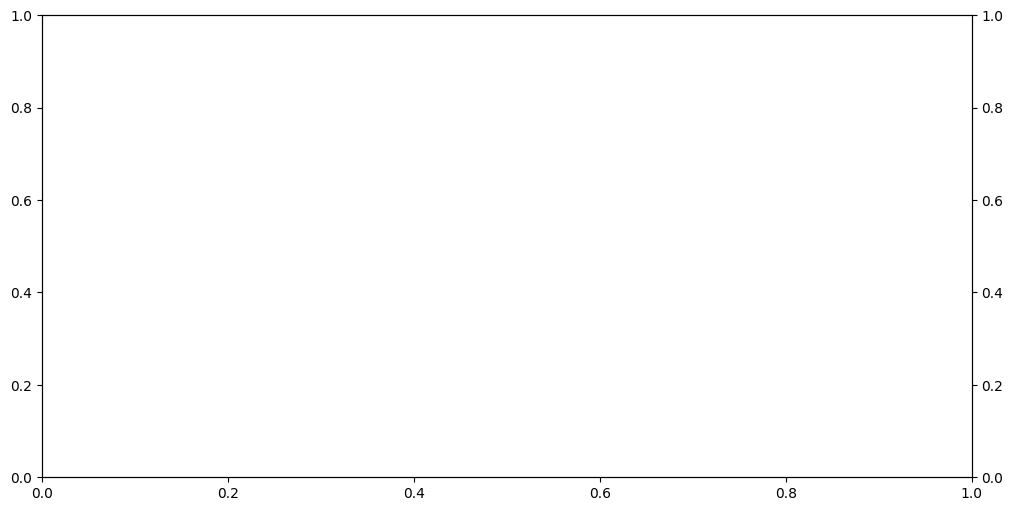

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

In [17]:
width = 0.4
x = range(len(top_exporters))

In [18]:
ax1.bar([p - width/2 for p in x], top_exporters['Value'], width=width, color='blue', label='Export Value')
ax2.bar([p + width/2 for p in x], top_exporters['Quantity'], width=width, color='orange', label='Export Quantity')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Top 10 Exporting Countries - Value and Quantity')

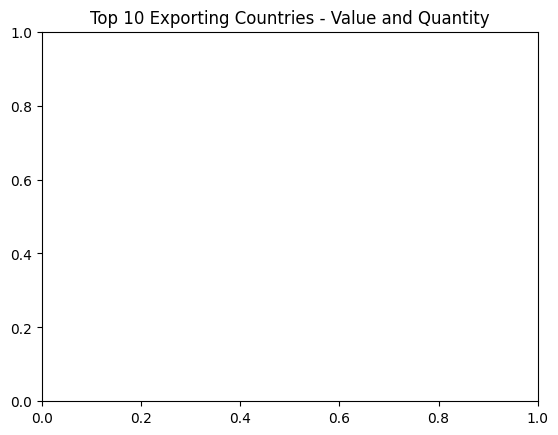

In [19]:
ax1.set_xticks(x)
ax1.set_xticklabels(top_exporters['Exporter_Name'], rotation=90)
ax1.set_ylabel("Export Value (thousands USD)")
ax2.set_ylabel("Export Quantity (metric tons)")
ax1.set_xlabel("Exporter Country")
plt.title("Top 10 Exporting Countries - Value and Quantity")

In [20]:
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [21]:
df_imports = df.groupby('Importer_Name').agg({'Value': 'sum', 'Quantity': 'sum'}).reset_index()

In [22]:
top_importers = df_imports.nlargest(10, 'Value')

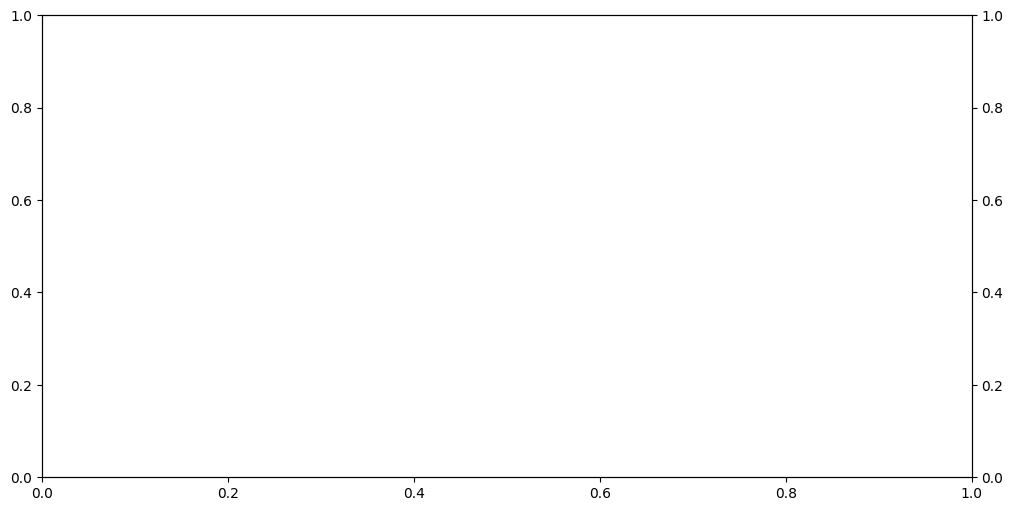

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

In [24]:
width = 0.4
x = range(len(top_importers))

In [25]:
ax1.bar([p - width/2 for p in x], top_exporters['Value'], width=width, color='blue', label='Import Value')
ax2.bar([p + width/2 for p in x], top_exporters['Quantity'], width=width, color='orange', label='Import Quantity')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Top 10 Importing Countries - Value and Quantity')

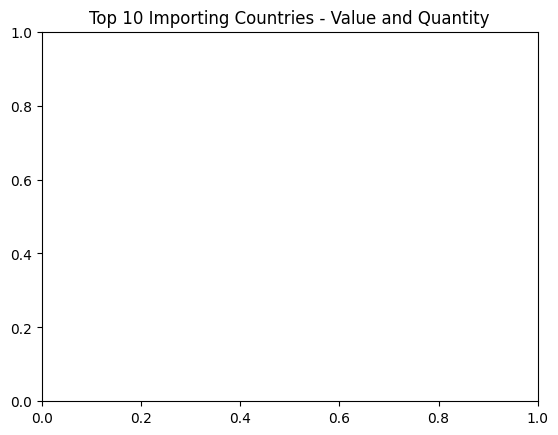

In [26]:
ax1.set_xticks(x)
ax1.set_xticklabels(top_importers['Importer_Name'], rotation=90)
ax1.set_ylabel("Import Value (thousands USD)")
ax2.set_ylabel("Import Quantity (metric tons)")
ax1.set_xlabel("Import Country")
plt.title("Top 10 Importing Countries - Value and Quantity")

In [27]:
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [28]:
df_imports.rename(columns={'Value': 'Import_Value'}, inplace=True)

In [29]:
df_profit = df_exports.merge(df_imports, left_on='Exporter_Name', right_on='Importer_Name', how='left').fillna(0)
df_profit['Profit'] = df_profit['Value'] - df_profit['Import_Value']

In [30]:
top_profitable = df_profit.nlargest(10, 'Profit')

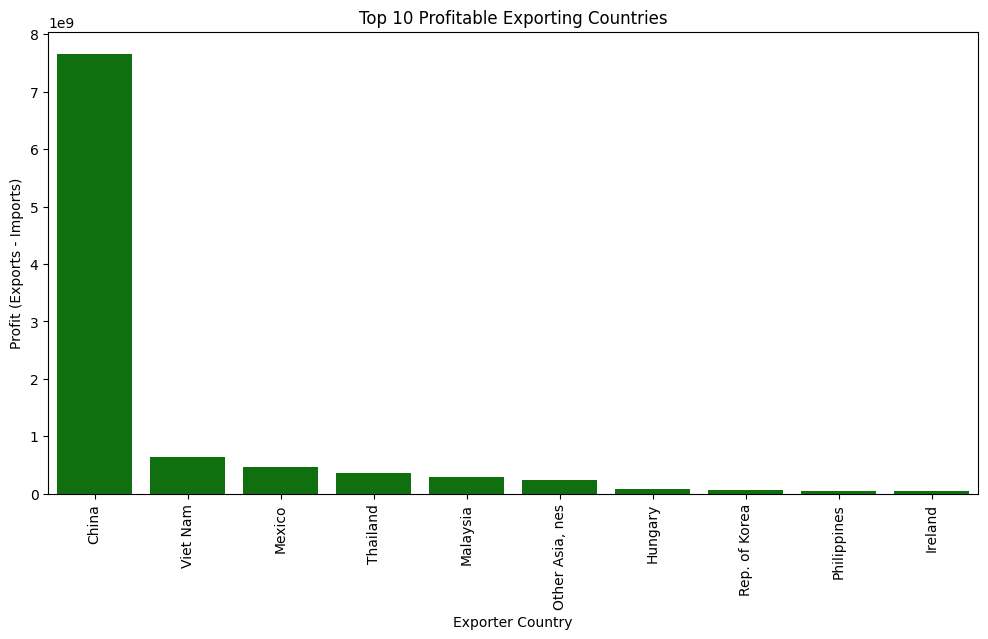

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Exporter_Name', y='Profit', data=top_profitable, color='green')
plt.xticks(rotation=90)
plt.ylabel("Profit (Exports - Imports)")
plt.xlabel("Exporter Country")
plt.title("Top 10 Profitable Exporting Countries")
plt.show()

In [32]:
# Get top 10 least profitable importers
least_profitable = df_profit.nsmallest(10, 'Profit')

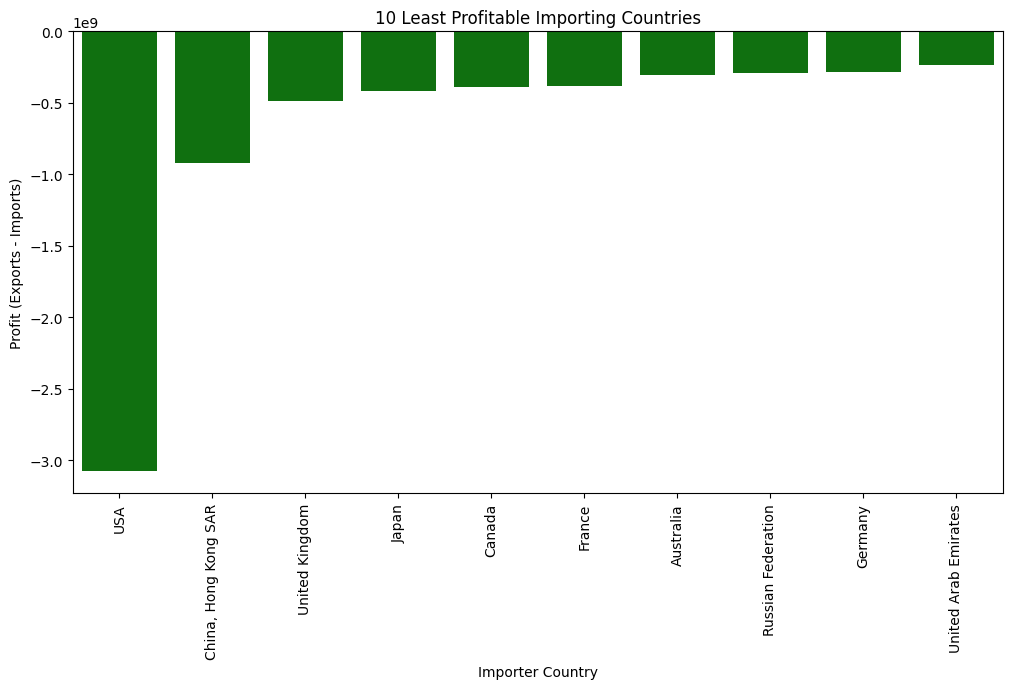

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importer_Name', y='Profit', data=least_profitable, color='green')
plt.xticks(rotation=90)
plt.ylabel("Profit (Exports - Imports)")
plt.xlabel("Importer Country")
plt.title("10 Least Profitable Importing Countries")
plt.show()

In [34]:
def get_top_trading_partners(country, df):
    exports = df[df['Exporter_Name'] == country].groupby('Importer_Name').agg({'Value': 'sum'}).nlargest(5, 'Value').reset_index()
    imports = df[df['Importer_Name'] == country].groupby('Exporter_Name').agg({'Value': 'sum'}).nlargest(5, 'Value').reset_index()
    return exports, imports

In [35]:
for country in top_profitable['Exporter_Name']:
  top_export_partners, top_import_partners = get_top_trading_partners(country, df)

In [37]:
print(f"Top 5 export partners for {country}:\n", top_export_partners)
print(f"Top 5 import partners for {country}:\n", top_import_partners)

Top 5 export partners for Ireland:
     Importer_Name         Value
0  United Kingdom  2.155211e+07
1         Germany  1.701901e+07
2     Netherlands  1.318026e+07
3          France  1.296799e+07
4          Sweden  9.320317e+06
Top 5 import partners for Ireland:
     Exporter_Name         Value
0  United Kingdom  2.466327e+07
1           China  1.921732e+07
2             USA  8.765344e+06
3         Germany  8.392625e+06
4     Netherlands  4.765946e+06


In [38]:
for country in least_profitable['Importer_Name']:
  top_export_partners, top_import_partners = get_top_trading_partners(country, df)

In [40]:
print(f"Top 5 export partners for {country}:\n", top_export_partners)
print(f"Top 5 import partners for {country}:\n", top_import_partners)

Top 5 export partners for United Arab Emirates:
   Importer_Name         Value
0          Iraq  3.927284e+07
1          Iran  2.639709e+07
2         China  1.074838e+07
3          Oman  9.956429e+06
4   Afghanistan  8.214110e+06
Top 5 import partners for United Arab Emirates:
    Exporter_Name         Value
0          China  2.159906e+08
1       Viet Nam  5.260681e+07
2            USA  1.935068e+07
3          India  1.798945e+07
4  Rep. of Korea  9.252726e+06


In [41]:
df_profit

,Exporter_Name,Value,Quantity_x,Importer_Name,Import_Value,Quantity_y,Profit
0,Afghanistan,4.087730e+04,2831.705,Afghanistan,1.106789e+07,189564.184,-1.102701e+07
1,Albania,1.631109e+05,19949.346,Albania,3.536450e+06,291357.972,-3.373340e+06
2,Algeria,3.382657e+05,68162.785,Algeria,2.997479e+07,2002250.551,-2.963653e+07
3,American Samoa,1.043787e+04,216.414,American Samoa,2.288845e+04,395.692,-1.245058e+04
4,Andorra,1.145795e+05,3337.957,Andorra,1.404799e+06,34604.667,-1.290220e+06
...,...,...,...,...,...,...,...
222,Viet Nam,7.918991e+08,9923828.257,Viet Nam,1.519051e+08,5654744.243,6.399940e+08
223,Wallis and Futuna Isds,9.732090e+02,44.622,Wallis and Futuna Isds,2.468093e+04,9082.645,-2.370772e+04
224,Yemen,1.439128e+04,926.701,Yemen,3.007101e+06,384472.351,-2.992709e+06
225,Zambia,3.977712e+05,8526.775,Zambia,3.936750e+06,194379.848,-3.538979e+06


In [42]:
# Load country-to-region mapping based on ISO codes
iso_to_region = {
    'Africa': ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CPV", "CMR", "CAF", "TCD", "COM", "COD", "DJI", "EGY", "GNQ", "ERI", "SWZ", "ETH", "GAB", "GMB", "GHA", "GIN", "GNB", "CIV", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", "MUS", "MAR", "MOZ", "NAM", "NER", "NGA", "RWA", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TZA", "TGO", "TUN", "UGA", "ZMB", "ZWE"],
    'Americas': ["ATG", "ARG", "BHS", "BRB", "BLZ", "BOL", "BRA", "CAN", "CHL", "COL", "CRI", "CUB", "DMA", "DOM", "ECU", "SLV", "GRD", "GTM", "GUY", "HTI", "HND", "JAM", "MEX", "NIC", "PAN", "PRY", "PER", "KNA", "LCA", "VCT", "SUR", "TTO", "USA", "URY", "VEN"],
    'Asia': ["AFG", "ARM", "AZE", "BHR", "BGD", "BTN", "BRN", "KHM", "CHN", "CYP", "GEO", "IND", "IDN", "IRN", "IRQ", "ISR", "JPN", "JOR", "KAZ", "KWT", "KGZ", "LAO", "LBN", "MYS", "MDV", "MNG", "MMR", "NPL", "PRK", "OMN", "PAK", "PSE", "PHL", "QAT", "SAU", "SGP", "KOR", "LKA", "SYR", "TJK", "THA", "TLS", "TUR", "TKM", "ARE", "UZB", "VNM", "YEM"],
    'Europe': ["ALB", "AND", "AUT", "BLR", "BEL", "BIH", "BGR", "HRV", "CZE", "DNK", "EST", "FIN", "FRA", "DEU", "GRC", "HUN", "ISL", "IRL", "ITA", "LVA", "LIE", "LTU", "LUX", "MLT", "MDA", "MCO", "MNE", "NLD", "MKD", "NOR", "POL", "PRT", "ROU", "RUS", "SMR", "SRB", "SVK", "SVN", "ESP", "SWE", "CHE", "UKR", "GBR", "VAT"],
    'Oceania': ["AUS", "FJI", "KIR", "MHL", "FSM", "NRU", "NZL", "PLW", "PNG", "WSM", "SLB", "TON", "TUV", "VUT"]
}

In [43]:
df_regions = df

In [44]:
# Function to map ISO code to region
def get_region(iso_code):
    for region, iso_list in iso_to_region.items():
        if iso_code in iso_list:
            return region
    return 'Other'

In [45]:
# Assign regions using ISO codes
df_regions['Exporter_Region'] = df_regions['country_iso3_x'].apply(get_region)
df_regions['Importer_Region'] = df_regions['country_iso3_y'].apply(get_region)

In [46]:
# Split dataset by region
# df_africa = df_regions[df_regions['Exporter_Region'] == 'Africa']
# df_americas = df_regions[df_regions['Exporter_Region'] == 'Americas']
# df_asia = df_regions[df_regions['Exporter_Region'] == 'Asia']
# df_europe = df_regions[df_regions['Exporter_Region'] == 'Europe']
# df_oceania = df_regions[df_regions['Exporter_Region'] == 'Oceania']
df_global = df_regions

In [47]:
df_global

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,Exporter_Name,country_iso2_x,country_iso3_x,country_code_y,Importer_Name,country_iso2_y,country_iso3_y,description,Exporter_Region,Importer_Region
64,2014,4,36,844332,24.087,0.045,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,"Printing, copying, and facsimile machines: sin...",Asia,Oceania
65,2014,4,36,847130,1.869,0.002,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,"Automatic data processing machines: portable, ...",Asia,Oceania
66,2014,4,36,847141,2.295,0.005,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,Automatic data processing machines: comprising...,Asia,Oceania
70,2014,4,36,851762,5.910,0.168,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,Communication apparatus (excluding telephone s...,Asia,Oceania
139,2014,4,40,846721,1.333,0.015,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,"Tools: for working in the hand, with self-cont...",Asia,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130258829,2013,894,842,847180,31.450,0.140,894,Zambia,ZM,ZMB,842,USA,US,USA,Units of automatic data processing machines: n...,Africa,Americas
130258845,2013,894,842,851769,0.499,0.002,894,Zambia,ZM,ZMB,842,USA,US,USA,Communication apparatus (excluding telephone s...,Africa,Americas
130258861,2013,894,842,902620,0.324,0.002,894,Zambia,ZM,ZMB,842,USA,US,USA,Instruments and apparatus: for measuring or ch...,Africa,Americas
130258862,2013,894,842,902780,2.019,0.007,894,Zambia,ZM,ZMB,842,USA,US,USA,Instruments and apparatus: for physical or che...,Africa,Americas


In [48]:
df_region_exports = df_global.groupby('Exporter_Region').agg({'Value': 'sum', 'Quantity': 'sum'}).reset_index()
top_exporters = df_region_exports.nlargest(10, 'Value')

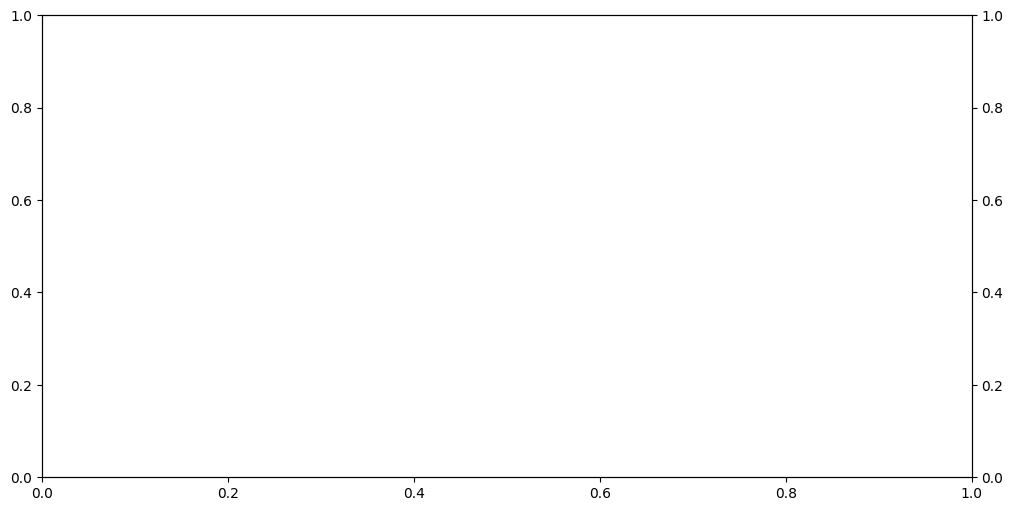

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

In [50]:
width = 0.4
x = range(len(top_exporters))

In [51]:
ax1.bar([p - width/2 for p in x], top_exporters['Value'], width=width, color='blue', label='Export Value')
ax2.bar([p + width/2 for p in x], top_exporters['Quantity'], width=width, color='orange', label='Export Quantity')

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Top Exporting Regions - Value and Quantity')

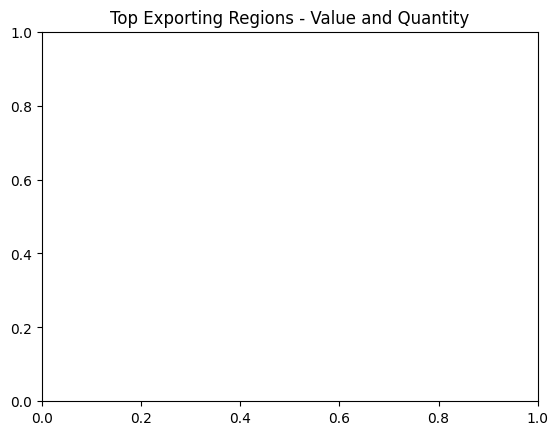

In [52]:
ax1.set_xticks(x)
ax1.set_xticklabels(top_exporters['Exporter_Region'], rotation=90)
ax1.set_ylabel("Export Value (thousands USD)")
ax2.set_ylabel("Export Quantity (metric tons)")
ax1.set_xlabel("Exporter Country")
plt.title("Top Exporting Regions - Value and Quantity")

In [53]:
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [54]:
df_region_imports = df.groupby('Importer_Region').agg({'Value': 'sum', 'Quantity': 'sum'}).reset_index()

In [55]:
top_importers = df_region_imports.nlargest(10, 'Value')

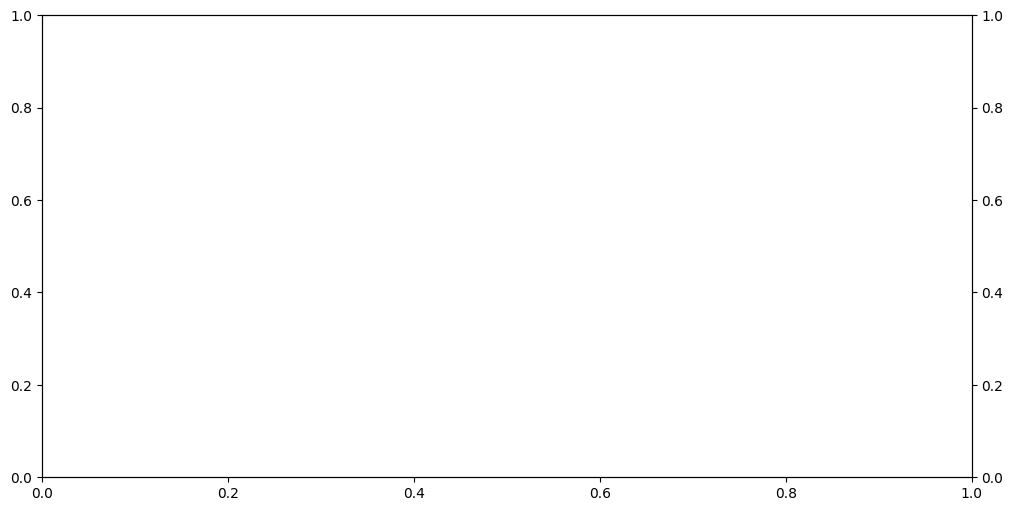

In [56]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

In [57]:
width = 0.4
x = range(len(top_importers))

In [58]:
ax1.bar([p - width/2 for p in x], top_exporters['Value'], width=width, color='blue', label='Import Value')
ax2.bar([p + width/2 for p in x], top_exporters['Quantity'], width=width, color='orange', label='Import Quantity')

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Top Importing Regions - Value and Quantity')

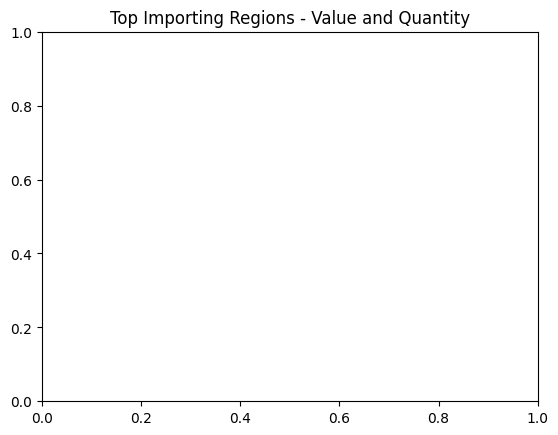

In [59]:
ax1.set_xticks(x)
ax1.set_xticklabels(top_importers['Importer_Region'], rotation=90)
ax1.set_ylabel("Import Value (thousands USD)")
ax2.set_ylabel("Import Quantity (metric tons)")
ax1.set_xlabel("Import Country")
plt.title("Top Importing Regions - Value and Quantity")

In [60]:
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [61]:
df_region_imports.rename(columns={'Value': 'Import_Value'}, inplace=True)

In [62]:
df_profit = df_region_exports.merge(df_region_imports, left_on='Exporter_Region', right_on='Importer_Region', how='left').fillna(0)
df_profit['Profit'] = df_profit['Value'] - df_profit['Import_Value']

In [63]:
top_profitable = df_profit.nlargest(10, 'Profit')

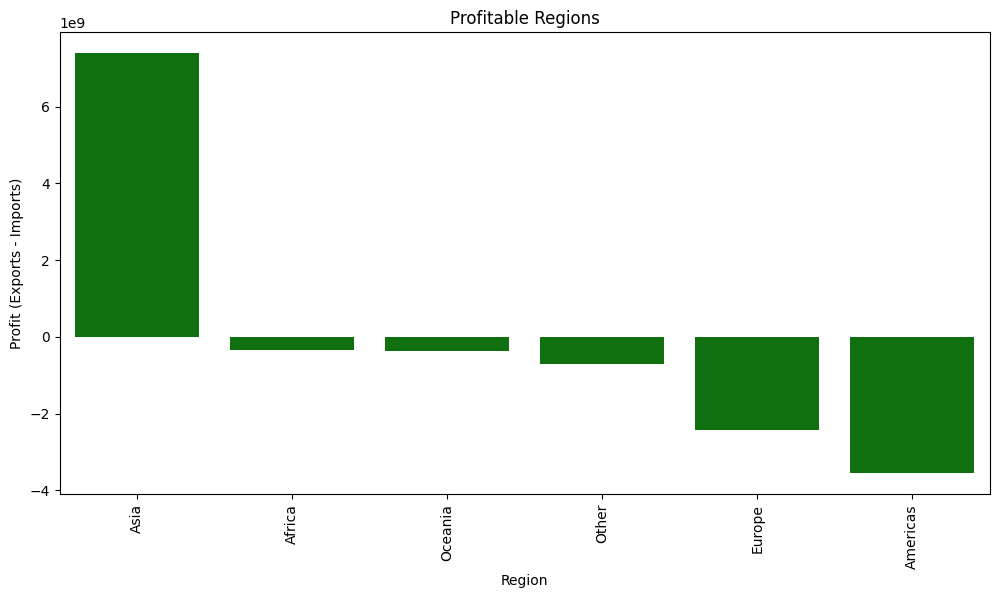

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Exporter_Region', y='Profit', data=top_profitable, color='green')
plt.xticks(rotation=90)
plt.ylabel("Profit (Exports - Imports)")
plt.xlabel("Region")
plt.title("Profitable Regions")
plt.show()

In [65]:
def get_top_trading_partners(region, df):
    exports = df_global[df_global['Exporter_Region'] == region].groupby('Importer_Region').agg({'Value': 'sum'}).nlargest(5, 'Value').reset_index()
    imports = df_global[df_global['Importer_Region'] == region].groupby('Exporter_Region').agg({'Value': 'sum'}).nlargest(5, 'Value').reset_index()
    return exports, imports

In [66]:
for region in top_profitable['Exporter_Region']:
  top_export_partners, top_import_partners = get_top_trading_partners(region, df)

In [68]:
print(f"Top 5 export regions for {region}:\n", top_export_partners)
print(f"Top 5 import regions for {region}:\n", top_import_partners)

Top 5 export regions for Americas:
   Importer_Region         Value
0        Americas  1.266250e+09
1            Asia  3.241945e+08
2          Europe  3.121594e+08
3           Other  8.577019e+07
4         Oceania  3.810520e+07
Top 5 import regions for Americas:
   Exporter_Region         Value
0            Asia  3.782842e+09
1        Americas  1.266250e+09
2          Europe  3.471013e+08
3           Other  1.939201e+08
4         Oceania  8.065490e+06


In [69]:
df_global

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,Exporter_Name,country_iso2_x,country_iso3_x,country_code_y,Importer_Name,country_iso2_y,country_iso3_y,description,Exporter_Region,Importer_Region
64,2014,4,36,844332,24.087,0.045,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,"Printing, copying, and facsimile machines: sin...",Asia,Oceania
65,2014,4,36,847130,1.869,0.002,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,"Automatic data processing machines: portable, ...",Asia,Oceania
66,2014,4,36,847141,2.295,0.005,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,Automatic data processing machines: comprising...,Asia,Oceania
70,2014,4,36,851762,5.910,0.168,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,Communication apparatus (excluding telephone s...,Asia,Oceania
139,2014,4,40,846721,1.333,0.015,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,"Tools: for working in the hand, with self-cont...",Asia,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130258829,2013,894,842,847180,31.450,0.140,894,Zambia,ZM,ZMB,842,USA,US,USA,Units of automatic data processing machines: n...,Africa,Americas
130258845,2013,894,842,851769,0.499,0.002,894,Zambia,ZM,ZMB,842,USA,US,USA,Communication apparatus (excluding telephone s...,Africa,Americas
130258861,2013,894,842,902620,0.324,0.002,894,Zambia,ZM,ZMB,842,USA,US,USA,Instruments and apparatus: for measuring or ch...,Africa,Americas
130258862,2013,894,842,902780,2.019,0.007,894,Zambia,ZM,ZMB,842,USA,US,USA,Instruments and apparatus: for physical or che...,Africa,Americas


In [70]:
df_profit = df_global.groupby(['Year', 'Exporter_Region'], as_index=False)['Value'].sum()
df_imports = df_global.groupby(['Year', 'Importer_Region'], as_index=False)['Value'].sum()
df_imports.rename(columns={'Value': 'Import_Value', 'Importer_Region': 'Exporter_Region'}, inplace=True)

In [71]:
# Merge exports and imports to calculate profit per region per year
df_profit = df_profit.merge(df_imports, on=['Year', 'Exporter_Region'], how='left').fillna(0)
df_profit['Profit'] = df_profit['Value'] - df_profit['Import_Value']

In [72]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [73]:
regions = ['Americas', 'Africa', 'Europe', 'Oceania', 'Asia', 'Global', 'Other']

In [74]:
for region in regions:
    df_region = df_profit[df_profit['Exporter_Region'] == region]

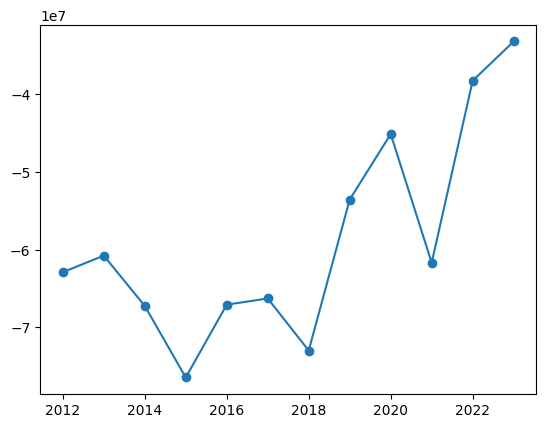

In [75]:
if not df_region.empty:  # Ensure the dataframe is not empty before plotting
        plt.plot(df_region['Year'], df_region['Profit'], marker='o', label=region)

/var/folders/13/n1l89mln5nvdj5127ntt9yj40000gs/T/ipykernel_91774/1238627577.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


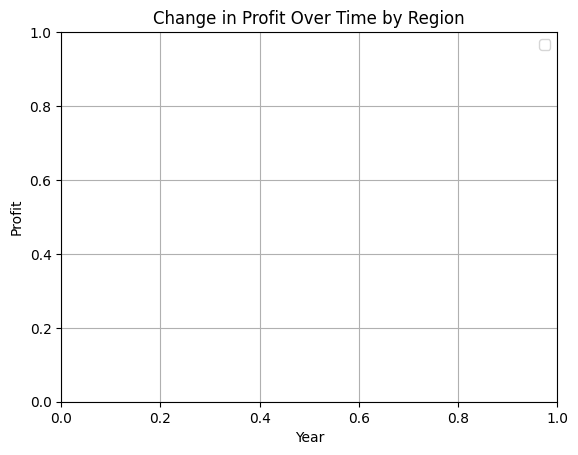

In [76]:
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Change in Profit Over Time by Region')
plt.legend()
plt.grid()
plt.show()

In [77]:
import pandas as pd

In [78]:
data = {
    "Indicator": [
        "Waste generation (Mt) - Total e-waste",
        "Waste generation (Mt) - Embedded Waste Printed Circuit Board",
        "Environmental sound collection and recycling (Mt) - Total e-waste",
        "Environmental sound collection and recycling (Mt) - Printed Circuit Board Waste",
        "Not environmental sound managed e-waste (Mt) - Total e-waste",
        "Not environmental sound managed e-waste (Mt) - Embedded and Printed Circuit Board Waste",
        "Environmental sound collection and recycling rates - Total e-waste",
        "Environmental sound collection and recycling rates - Printed Circuit Board Waste",
        "Not environmental sound managed rates - Total e-waste",
        "Not environmental sound managed rates - Printed Circuit Board Waste",
        "Total Exports (kt)",
        "Controlled - E-waste reported as hazardous",
        "Controlled - Printed Circuit Board Waste",
        "Uncontrolled - Undocumented exports of mixed used EEE and e-waste",
        "Total Imports (kt)",
        "Controlled - E-waste reported as hazardous",
        "Controlled - Printed Circuit Board Waste",
        "Uncontrolled - Undocumented exports of mixed used EEE and e-waste",
        "Inhabitants (Million)"
    ],
    "Africa": [2.9, 0.1, 0.03, 0.01, 2.9, 0.1, "1%", "13%", "99%", "87%", 132, 12, 7, 113, 546, 19, 0, 527, 1152],
    "Americas": [13.1, 0.3, 1.2, 0.1, 11.9, 0.2, "9%", "44%", "91%", "56%", 547, 31, 128, 388, 393, 24, 65, 305, 984],
    "Asia": [24.9, 0.6, 2.9, 0.1, 22.0, 0.5, "12%", "17%", "88%", "83%", 2537, 1038, 36, 1463, 2889, 964, 111, 1814, 4445],
    "Europe": [12.0, 0.3, 5.1, 0.2, 6.9, 0.1, "42%", "61%", "58%", "39%", 1850, 375, 184, 1290, 1248, 457, 172, 619, 740],
    "Oceania": [0.7, 0.01, 0.06, 0.005, 0.6, 0.01, "9%", "31%", "91%", "69%", 21, 8, 4, 10, 0, 0, 0, 0, 42],
    "Global": [53.6, 1.2, 9.3, 0.4, 44.3, 0.8, "17%", "34%", "83%", "66%", 5086, 1464, 358, 3264, 5076, 1464, 348, 3264, 7363]
}

In [79]:
# Create DataFrame
df_pdf = pd.DataFrame(data)

In [80]:
df_pdf

,Indicator,Africa,Americas,Asia,Europe,Oceania,Global
0,Waste generation (Mt) - Total e-waste,2.9,13.1,24.9,12.0,0.7,53.6
1,Waste generation (Mt) - Embedded Waste Printed...,0.1,0.3,0.6,0.3,0.01,1.2
2,Environmental sound collection and recycling (...,0.03,1.2,2.9,5.1,0.06,9.3
3,Environmental sound collection and recycling (...,0.01,0.1,0.1,0.2,0.005,0.4
4,Not environmental sound managed e-waste (Mt) -...,2.9,11.9,22.0,6.9,0.6,44.3
5,Not environmental sound managed e-waste (Mt) -...,0.1,0.2,0.5,0.1,0.01,0.8
6,Environmental sound collection and recycling r...,1%,9%,12%,42%,9%,17%
7,Environmental sound collection and recycling r...,13%,44%,17%,61%,31%,34%
8,Not environmental sound managed rates - Total ...,99%,91%,88%,58%,91%,83%
9,Not environmental sound managed rates - Printe...,87%,56%,83%,39%,69%,66%


In [81]:
pip install statsmodels

  Using cached statsmodels-0.14.4-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp313-cp313-macosx_11_0_arm64.whl (9.9 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl (22.4 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [82]:
df_profit

,Year,Exporter_Region,Value,Import_Value,Profit
0,2012,Africa,3.437542e+06,3.149831e+07,-2.806077e+07
1,2012,Americas,1.635804e+08,4.169321e+08,-2.533517e+08
2,2012,Asia,8.702066e+08,3.335256e+08,5.366810e+08
3,2012,Europe,3.114920e+08,4.761382e+08,-1.646463e+08
4,2012,Oceania,2.790268e+06,3.051315e+07,-2.772288e+07
...,...,...,...,...,...
67,2023,Americas,1.944589e+08,5.314596e+08,-3.370007e+08
68,2023,Asia,1.171816e+09,4.821404e+08,6.896757e+08
69,2023,Europe,3.853046e+08,6.394276e+08,-2.541229e+08
70,2023,Oceania,2.966169e+06,3.704638e+07,-3.408021e+07


In [83]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
regions = ['Americas', 'Africa', 'Europe', 'Oceania', 'Asia', 'Global', 'Other']

In [84]:
for region in regions:
    df_region = df_profit[df_profit['Exporter_Region'] == region]

In [87]:
if df_region.empty:
    print(f"No data available for region: {region}")
else:
    # Fit Exponential Smoothing Model
    model = ExponentialSmoothing(df_region['Profit'], trend='add', seasonal=None, damped_trend=True)
    model_fit = model.fit()

/Users/pranavgunhal/Downloads/e-waste research /venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/pranavgunhal/Downloads/e-waste research /venv/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [89]:
# Forecast next 5 years
forecast_years = 5
future_years = list(range(df_region['Year'].max() + 1, df_region['Year'].max() + 1 + forecast_years))
forecast = model_fit.forecast(steps=forecast_years)

/Users/pranavgunhal/Downloads/e-waste research /venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/pranavgunhal/Downloads/e-waste research /venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


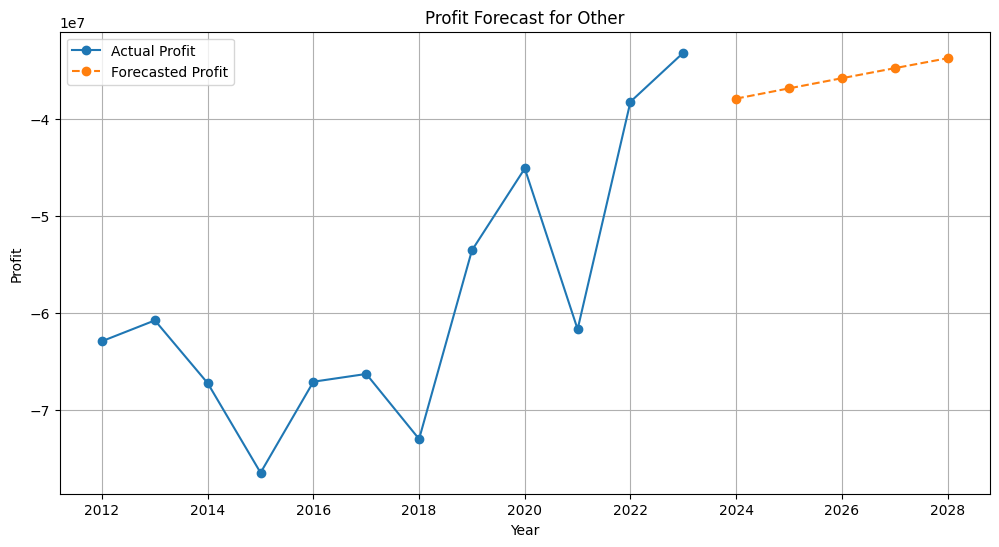

In [90]:
# Plot actual vs forecasted profit
plt.figure(figsize=(12, 6))
plt.plot(df_region['Year'], df_region['Profit'], marker='o', label='Actual Profit')
plt.plot(future_years, forecast, marker='o', linestyle='dashed', label='Forecasted Profit')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title(f'Profit Forecast for {region}')
plt.legend()
plt.grid()
plt.show()

In [91]:
# ==============================================
# ADDITIONAL LOGIC TO REPLACE HARDCODED HNUs
# AND GENERATE PIPELINE-SPECIFIC SANKEYS
# ==============================================

In [92]:
# Load and classify HS codes by lifecycle stage from the mining metadata
mining_df = pd.read_csv("Data - Mining-HSCodes.csv")
mining_df = mining_df[pd.to_numeric(mining_df["HS Code"], errors="coerce").notnull()]
mining_df["HS Code"] = mining_df["HS Code"].astype(int)

In [93]:
def classify_stage(form):
    form = str(form).lower()
    if "ore" in form or "concentrate" in form:
        return "Mining"
    elif "refined" in form or "carbonate" in form or "hydroxide" in form:
        return "Refining"
    elif "unwrought" in form or "intermediate" in form:
        return "Manufacturing"
    elif "articles" in form or "compounds" in form:
        return "Assembly"
    else:
        return "Other"

In [94]:
mining_df["Stage"] = mining_df["Form"].apply(classify_stage)
stage_hscode_map = mining_df.groupby("Stage")["HS Code"].apply(list).to_dict()

In [95]:
# Replace the hardcoded required_product_codes with one stage at a time
import plotly.graph_objects as go

In [99]:
def generate_sankey_for_stage(stage_name, hs_codes, df, mining_df):
    print(f"\n====== GENERATING SANKEY FOR: {stage_name} ======\n")
    filtered_df = df[df["Product"].isin(hs_codes)]
    enriched_df = filtered_df.merge(mining_df[["HS Code", "Mineral/Metal", "Form"]], 
                                    left_on="Product", right_on="HS Code", how="left")
    enriched_df["Material"] = enriched_df["Mineral/Metal"] + " (" + enriched_df["Form"] + ")"
    all_labels = pd.Series(
        pd.concat([enriched_df["Material"], enriched_df["Exporter_Name"], enriched_df["Importer_Name"]])
        .unique()
    ).reset_index(drop=True)
    label_to_index = {label: i for i, label in enumerate(all_labels)}
    source, target, value = [], [], []
    for _, row in enriched_df.iterrows():
        mat = row["Material"]
        exporter = row["Exporter_Name"]
        importer = row["Importer_Name"]
        val = row["Value"]
    source.append(label_to_index[mat])
    target.append(label_to_index[exporter])
    value.append(val)
    source.append(label_to_index[exporter])
    target.append(label_to_index[importer])
    value.append(val)
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels.tolist()
        ),
        link=dict(
            source=source,
            target=target,
            value=value
        ))])
    fig.update_layout(title_text=f"{stage_name} Material Flow Sankey", font_size=10)
    fig.show()

In [100]:
# RUN for each pipeline
for stage in ["Mining", "Refining", "Manufacturing", "Assembly"]:
    if stage in stage_hscode_map:
        current_hs_list = stage_hscode_map[stage]
        generate_sankey_for_stage(stage, current_hs_list, df, mining_df)


====== GENERATING SANKEY FOR: Mining ======



UnboundLocalError: cannot access local variable 'mat' where it is not associated with a value